# __Homework 4 Analysis__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [84]:

def helper(t):
    if t == 'Gaussian':
        return 1
    else:
        return 0
    
df_bucket = pd.read_csv("/Users/willdunn/GitWillDone/Data_Analytics_and_Vis/Homeworks/Homework4/Results/bucket.csv")
df_bucket['Distribution'] = df_bucket['Distribution'].astype(str)
df_bucket['Distribution_Num'] = df_bucket.apply(lambda row: helper(row.Distribution), axis=1)

df_kd = pd.read_csv("/Users/willdunn/GitWillDone/Data_Analytics_and_Vis/Homeworks/Homework4/Results/kdtree.csv")
df_kd['Distribution'] = df_kd['Distribution'].astype(str)
df_kd['Distribution_Num'] = df_kd.apply(lambda row: helper(row.Distribution), axis=1)

df_quad = pd.read_csv("/Users/willdunn/GitWillDone/Data_Analytics_and_Vis/Homeworks/Homework4/Results/quadtree.csv")
df_quad['Distribution'] = df_quad['Distribution'].astype(str)
df_quad['Distribution_Num'] = df_quad.apply(lambda row: helper(row.Distribution), axis=1)
df_quad.head()

,K,Dimension,Number of Points,Time,Distribution,Distribution_Num
0,1,2,50,1.820000e-07,Uniform,0
1,2,2,50,1.284000e-07,Uniform,0
2,3,2,50,1.254000e-07,Uniform,0
3,4,2,50,1.260000e-07,Uniform,0
4,5,2,50,1.261000e-07,Uniform,0


# K-Analysis

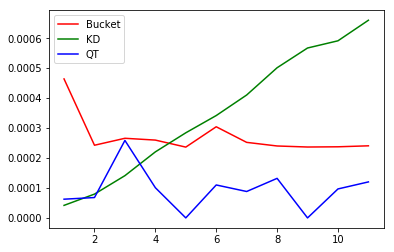

In [39]:

df_k_bucket = df_bucket[(df_bucket['Dimension'] == 2) & 
                        (df_bucket['Number of Points'] == 12800) &
                        (df_bucket['Distribution'] == 'Uniform')]

df_k_kd = df_kd[(df_kd['Dimension'] == 2) & (df_kd['Number of Points'] == 12800) &
                        (df_kd['Distribution'] == 'Uniform')]

df_k_quad = df_quad[(df_quad['Dimension'] == 2) & (df_quad['Number of Points'] == 12800) &
                        (df_quad['Distribution'] == 'Uniform')]

plt.plot(df_k_bucket["K"], df_k_bucket["Time"], 'r', label="Bucket")
plt.plot(df_k_kd["K"], df_k_kd["Time"], 'g', label="KD")
plt.plot(df_k_quad["K"], df_k_quad["Time"], 'b', label="QT")
plt.legend()
plt.show()

## Results: 

From the plot above we can see that the quad-tree, in most occassions, outperformed the other two data structures (DS) in terms of time to complete the queries.  The KD exhibited linear growth, but the other two did not seem to have much of an affect (an asymptotic behavioral line would shows almost a constant line/behavior) as the K increased. 

# Dimension Analysis

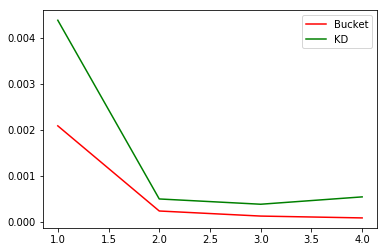

In [85]:
df_dim_bucket = df_bucket[(df_bucket['K'] == 8) & 
                        (df_bucket['Number of Points'] == 12800) &
                        (df_bucket['Distribution'] == 'Uniform')]

df_dim_kd = df_kd[(df_kd['K'] == 8) & (df_kd['Number of Points'] == 12800) &
                        (df_kd['Distribution'] == 'Uniform')]

plt.plot(df_dim_bucket["Dimension"], df_dim_bucket["Time"], 'r', label ="Bucket")
plt.plot(df_dim_kd["Dimension"], df_dim_kd["Time"], 'g', label = "KD")
plt.legend()

## Results: 
### Note: the QT has a consistent dimension value of 2, so it was not used in the analysis.

As the dimensions increase, both KD and Bucket data structures decrease in their time to complete queries and other related functions.  While the Bucket begins with a grandiose difference in timing (a magnitude of more than 100%), this difference is less disparanging as the number of dimensions increase.

Time spend seems to be inversely proportional to the amount of dimensions in the relevant data structures.

# Sample Size Analysis

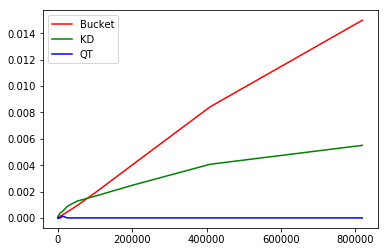

In [86]:
df_num_bucket = df_bucket[(df_bucket['Dimension'] == 2) & (df_bucket['K'] == 8) &
                        (df_bucket['Distribution'] == 'Uniform')]

df_num_kd = df_kd[(df_kd['Dimension'] == 2) & (df_kd['K'] == 8) & 
                  (df_kd['Distribution'] == 'Uniform')]

df_num_quad = df_quad[(df_quad['Dimension'] == 2) & (df_quad['K'] == 8) &
                        (df_quad['Distribution'] == 'Uniform')]

plt.plot(df_num_bucket["Number of Points"], df_num_bucket["Time"], 'r', label = 'Bucket')
plt.plot(df_num_kd["Number of Points"], df_num_kd["Time"], 'g', label = 'KD')
plt.plot(df_num_quad["Number of Points"], df_num_quad["Time"], 'b', label = 'QT')
plt.legend()

## Results: 
The Bucket DS took the longest of those shown, with KD tree following, and Quad tree being the fastest.  There is only a relevancy in the QT being the fastest in the 2D comparison.  We can draw upon the analysis above to see that the other two DSs increase in time efficiency as the number of dimensions increases.  So, we can only conclude from these findings that QT has the highest performance in the 2D space. 

It is also interesting to note that the Bucket DS beat the KD tree above at a sample size of 128,000.  While this is illustrated here as well, we can see that as the sample size increases, the KD tree pulls ahead and is captured in an almost logrithmic (O(nlogn)) asymptotic behavior, while the Bucket DS is seemingly linear (O(n)).

The number of points doesn't have a great effect on the QT.

# Distribution Analysis

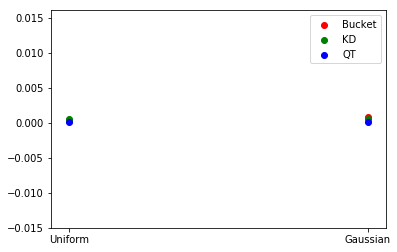

In [42]:
df_dis_bucket = df_bucket[(df_bucket['Dimension'] == 2) & 
                        (df_bucket['Number of Points'] == 12800) & (df_bucket['K'] == 8)]

df_dis_kd = df_kd[(df_kd['Dimension'] == 2) & (df_kd['Number of Points'] == 12800) &
                        (df_kd['K'] == 8)]

df_dis_quad = df_quad[(df_quad['Dimension'] == 2) & (df_quad['Number of Points'] == 12800) &
                        (df_quad['K'] == 8)]

plt.scatter(df_dis_bucket["Distribution"], df_dis_bucket["Time"], marker='o', color='r', label='Bucket') 
plt.scatter(df_dis_kd["Distribution"], df_dis_kd["Time"], marker='o', color='g', label='KD')
plt.scatter(df_dis_quad["Distribution"], df_dis_quad["Time"], marker='o', color='b', label='QT')
plt.legend()
plt.show()

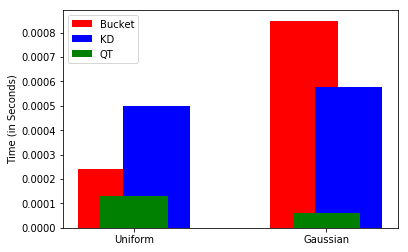

In [83]:
fig, ax = plt.subplots()
ind = np.arange(len(df_dis_bucket["Distribution"]))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = ax.bar(ind - width/3, df_dis_bucket["Time"], width, color ='r',
                label='Bucket')

rects2 = ax.bar(ind+ width/3, df_dis_kd["Time"], width, color ='b',
                label='KD')

rects3 = ax.bar(ind, df_dis_quad["Time"], width,color ='g',
                label='QT')

ax.set_ylabel('Time (in Seconds)')
ax.set_xticks(ind)
ax.set_xticklabels(('Uniform', 'Gaussian'))
        
plt.legend()
plt.show()

## Results: 
The bar chart is used in tandem with the above scatter plot to highlight the data in more detail.  While it looks like the DSs are converging in the scatter plot, it can be seen that there are, in fact, some differences illustrated in the bar chart.  Quad trees outperform the other DSs in both distributions.  Buckets appear to do better in a uniform distribution, whereas in a Gaussian distribution it performs substantially worse (approximately four times).  The KD tree is the least affected, in terms of performance dissimilatrity, between the three, and the QT doesn't too large a difference as well.

# Bucket Regression Analysis

In [43]:
x = df_bucket[['K', 'Dimension', 'Number of Points', 'Distribution_Num']]
y = df_bucket['Time']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
result.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     898.2
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:36:57   Log-Likelihood:                 4786.9
No. Observations:                1320   AIC:                            -9564.
Df Residuals:                    1315   BIC:                            -9538.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0003      0.001     -0.520      0.603      -0.001       0.001
K                -2.536e-05   5.62e-05     -0.452      0.652      -0.000    8.48e-05
Dimension           -0.0009      0.000     -5.499      0.000      -0.001      -0.001
Number of Points  4.687e-08   8.13e-10     57.660      0.000    4.53e-08    4.85e-08
Distribution_Num     0.0055      0.000     15.413      0.000       0.005       0.006
==============================================================================
Omnibus:                      265.995   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2414.233
Skew:                          -0.661   Prob(JB):                         0.00
Kurtosis:                       9.492   Cond. No.                     8.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results:
The OLS data for the Bucket DS shows that the time spent on completing the methods of the Bucket is correlated highest with the Dimension, Number of Points and Distribution fields, as can be seen from the low p-values.

# KD Tree Regression Analysis

In [44]:
x = df_kd[['K', 'Dimension', 'Number of Points', 'Distribution_Num']]
y = df_kd['Time']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     69.13
Date:                Mon, 24 Jun 2019   Prob (F-statistic):           3.69e-53
Time:                        15:37:51   Log-Likelihood:                 4125.1
No. Observations:                1320   AIC:                            -8240.
Df Residuals:                    1315   BIC:                            -8214.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0015      0.001      1.578      0.115      -0.000       0.003
K                    0.0007   9.27e-05      7.933      0.000       0.001       0.001
Dimension           -0.0021      0.000     -8.157      0.000      -0.003      -0.002
Number of Points  1.627e-08   1.34e-09     12.126      0.000    1.36e-08    1.89e-08
Distribution_Num  1.943e-05      0.001      0.033      0.974      -0.001       0.001
==============================================================================
Omnibus:                     1859.986   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           411060.176
Skew:                           8.040   Prob(JB):                         0.00
Kurtosis:                      87.943   Cond. No.                     8.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results:
The KD tree, on the other hand, swaps the importance of K with the Distribution number. 

# Quad Tree Regression Analysis

In [45]:
x = df_quad[['K', 'Dimension', 'Number of Points', 'Distribution_Num']]
y = df_quad['Time']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     38.49
Date:                Mon, 24 Jun 2019   Prob (F-statistic):           2.55e-21
Time:                        15:38:03   Log-Likelihood:                 2464.9
No. Observations:                 330   AIC:                            -4922.
Df Residuals:                     326   BIC:                            -4907.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
K                 3.241e-06   2.42e-06      1.341      0.181   -1.51e-06    7.99e-06
Dimension        -7.186e-06   9.24e-06     -0.778      0.437   -2.54e-05     1.1e-05
Number of Points  3.678e-10    3.5e-11     10.515      0.000    2.99e-10    4.37e-10
Distribution_Num  2.698e-05   1.53e-05      1.766      0.078   -3.08e-06    5.71e-05
==============================================================================
Omnibus:                      229.862   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3412.874
Skew:                           2.690   Prob(JB):                         0.00
Kurtosis:                      17.808   Cond. No.                     5.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results:
Because the QT has a fixed number of dimensions, it is no suprise that it has no effect on the timing of the DS.  The sample size is what affects it the most, and the distribution type comes close to not being able to reject the null hypothesis at a 0.05 level, but it fell short by 0.023.

# Unusual Aspects

In the above QT OLS, there seems to be a difference in the plotting of the distribution type.  The plot shows that there is really no effect between the DS and the distribution type.  This is more of an interesting observation because the OLS shows the distribution type almost being within a 0.05 p-value of not being able to reject the significance of it.

While looking at the K-analysis of the DSs, it is suprising that there isn't more of a constant line for the QT and Bucket DSs.  Why it varies depending on the iteration, and how much is also interesting because the Bucket DS showed a constant line when run through debug mode rather than a normal build.